In [3]:
# Imports (External)
import numpy as np
import pandas as pd
import datetime as dt
import xlrd
import xlsxwriter
from collections import OrderedDict
import copy

import sys
sys.path.append('../')  

# Visualization/plotting imports
import matplotlib as mpl
import matplotlib.pyplot as plt

import pywt
from pywt import wavedec, waverec
from scipy import signal
from statsmodels.robust import mad
from sklearn import preprocessing

# Internal Imports
from wsae_lstm.utils import pickle_load,pickle_save
#from wsae_lstm.models.wavelet import waveletSmooth

In [4]:
dict_dataframes_index=pickle_load(path_filename="../data/interim/cdii_tvt_split.pickle")
ddi_scaled=pickle_load(path_filename="../data/interim/cdii_tvt_split_scaled.pickle")
ddi_denoised=pickle_load(path_filename="../data/interim/cdii_tvt_split_scaled_denoised.pickle")

In [5]:
def waveletSmooth( x, wavelet="haar", level=2, declevel=2):
    # calculate the wavelet coefficients
    coeff = pywt.wavedec( x, wavelet, mode='periodization',level=declevel,axis=0 )
    # calculate a threshold
    sigma = mad(coeff[-level])
    print("sigma: ",sigma)
    uthresh = sigma * np.sqrt( 2*np.log( len( x ) ) )
    print("uthresh: ", uthresh)
    coeff[1:] = ( pywt.threshold( i, value=uthresh, mode="hard" ) for i in coeff[1:] )
    # reconstruct the signal using the thresholded coefficients
    y = pywt.waverec( coeff, wavelet, mode='periodization',axis=0 )
    return y

In [6]:
scaler = preprocessing.RobustScaler()

X_train = dict_dataframes_index['nifty 50 index data'][1][1]
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled,columns=list(X_train.columns))

# X_val = dict_dataframes_index['nifty 50 index data'][1][2]
# X_val_scaled = scaler.transform(X_val)
# X_val_scaled_df = pd.DataFrame(X_val_scaled,columns=list(X_val.columns))

# X_test = dict_dataframes_index['nifty 50 index data'][1][3]
# X_test_scaled = scaler.transform(X_test)
# X_test_scaled_df = pd.DataFrame(X_test_scaled,columns=list(X_test.columns))


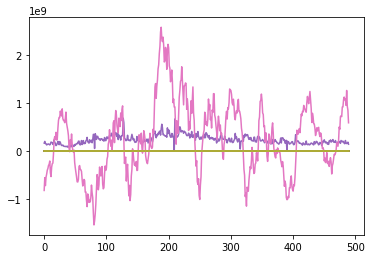

In [7]:
plt.plot(X_train.values);

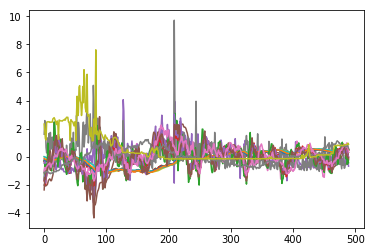

In [8]:
plt.plot(X_train_scaled_df.values);

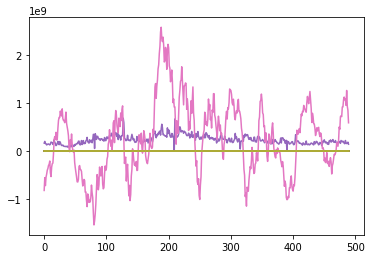

In [9]:
# Test inverse_transform to reverse scaling
plt.plot(scaler.inverse_transform(X_train_scaled_df));

In [10]:
pd.DataFrame(waveletSmooth(ddi_scaled['nifty 50 index data'][1][1])).head(1)

sigma:  [0.04939658 0.04550829 0.04832723 0.05920866 0.36142095 0.18226018
 0.3081891  0.51315239 0.02199135 0.02186411 0.03792052 0.03081983
 0.5377685  0.34072106 0.32099246 0.42394007 0.26288589 0.08262499
 0.0135089 ]
uthresh:  [0.17386483 0.1601789  0.17010093 0.20840113 1.27212016 0.64151467
 1.08475606 1.80618057 0.0774046  0.07695675 0.13347165 0.10847885
 1.89282374 1.1992612  1.12982101 1.49217335 0.92529898 0.29082132
 0.04754829]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.302081,-0.294161,-0.322845,-0.306605,-0.44357,-2.040011,-0.961938,1.709341,-0.032972,-0.026006,-0.261274,-0.173347,-1.275034,-1.668555,-1.576125,-1.603616,-0.871277,-1.105886,2.326196


In [11]:
pd.DataFrame(waveletSmooth(ddi_scaled['nifty 50 index data'][1][2])).head(1)

sigma:  [0.03252946 0.02993163 0.02540335 0.02272013 0.21847102 0.04729494
 0.32410651 0.187184   0.00741192 0.00686002 0.01765203 0.00895144
 0.21996788 0.17703286 0.13833536 0.15014691 0.10233146 0.06093593
 0.08105342]
uthresh:  [0.09416314 0.08664319 0.07353517 0.06576805 0.63240886 0.13690483
 0.93819233 0.54184221 0.02145531 0.01985772 0.05109739 0.02591177
 0.63674184 0.51245768 0.40043987 0.43463081 0.29621927 0.17639147
 0.23462565]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.476825,0.470692,0.500779,0.472125,-0.798272,0.241742,-0.048743,-0.614159,0.513918,0.526117,0.481439,0.50993,-0.370022,-0.105744,-0.118906,-0.288212,0.343153,0.557645,0.993394


In [12]:
pd.DataFrame(waveletSmooth(ddi_scaled['nifty 50 index data'][1][3])).head(1)

sigma:  [0.05526143 0.0657368  0.06952674 0.06134436 0.22678124 0.15162596
 0.53210228 0.37495112 0.01578969 0.01036554 0.03005296 0.0211213
 0.44889338 0.27078156 0.18138578 0.19567746 0.17285944 0.10534687
 0.10469401]
uthresh:  [0.15937695 0.18958848 0.20051886 0.17692042 0.6540493  0.43729741
 1.53461159 1.0813792  0.04553831 0.02989478 0.08667436 0.06091496
 1.29463264 0.78094857 0.52312634 0.56434431 0.49853592 0.30382603
 0.30194314]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.005642,1.048609,1.036944,1.027124,-0.464185,1.162558,0.44609,-0.123304,0.946069,0.951874,0.98042,0.972389,0.496795,0.58049,0.379222,0.304462,1.210551,-0.339951,1.140091
